In [1]:
import pandas as pd
import os
import re
import numpy as np
import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('AGGREGATED_DATA_mobile_developer_madrid.csv')

In [4]:
df.shape

(3099, 16)

In [5]:
df.isna().sum()

Unnamed: 0                                  0
company_name                                0
position                                    0
location                                    0
url                                         0
date_posted                                 1
Number of applicants                      420
full-time/part-time                      1887
seniority level                          2502
employees                                  55
descriptions                                0
industry                                  373
top competitive skills                      0
Hiring Trend Company Wide                2260
Hiring Trend Company Wide-Engineering    2268
Median Tenure                            2260
dtype: int64

In [6]:
df['seniority level'].value_counts()

associate    597
Name: seniority level, dtype: int64

In [7]:
df = df.drop('Unnamed: 0', axis=1)

In [8]:
df.columns

Index(['company_name', 'position', 'location', 'url', 'date_posted',
       'Number of applicants', 'full-time/part-time', 'seniority level',
       'employees', 'descriptions', 'industry', 'top competitive skills',
       'Hiring Trend Company Wide', 'Hiring Trend Company Wide-Engineering',
       'Median Tenure'],
      dtype='object')

In [9]:
pd.DataFrame(df['position'].value_counts()).reset_index()

,index,position
0,software engineer,72
1,software development engineer,67
2,ios developer,50
3,android developer,45
4,java developer,40
5,java software engineer,39
6,programador full stack,39
7,full stack engineer,31
8,senior software engineer,28
9,full stack developer,24


In [10]:
df['position'] = df['position'].apply(lambda x: x.lower())
df['descriptions'] = df['descriptions'].apply(lambda x: x.lower())

In [11]:
def filter_df(x, y):
    if ('mobile' in x) or ('android' in x) or ('ios' in x) or ('swift' in x) or ('kotlin' in x) :
        return "keep"
    else:
        if ('android' in y) or ('ios' in y) or ('mobile' in y) or ('swift' in y) or ('kotlin' in y):
            return 'keep'
        else:
            return 'remove'     
df['new_filter'] = list(map(filter_df, df['position'], df['descriptions']))

In [12]:
remove = df[df['new_filter']=='remove'].reset_index(drop=True)

In [13]:
df = df[df['new_filter']=='keep'].reset_index(drop=True)
df = df.drop(['new_filter'], axis=1)

In [14]:
df.shape

(1736, 15)

# Total Job Postings by Time Frames

In [15]:
def dates_posted_to_time_frames(x):
    if not pd.isna(x):
        if ('hour' in x) or ('minute' in x):
            return 'within 1 week'
        try:
            num = int(re.findall('\d+', x)[0])
        except TypeError:
            return np.NaN
        except IndexError:
            return np.nan
        if 'week' in x:
            if num == 1:
                return 'within 1 week'
            elif num == 2:
                return 'Between 1 and 2 weeks'
            elif num == 3:
                return 'Between 2 and 3 weeks'
            else:
                return "More than 3 weeks" 
        else:
            return "More than 3 weeks" 
    else:
        return np.nan
df['time_frames'] = list(map(dates_posted_to_time_frames, df['date_posted']))
# df['time_frames'].value_counts()

In [16]:
temp = pd.DataFrame(df['time_frames'].value_counts()).reset_index()
temp.columns =['time_frames', 'number of postings']
temp

,time_frames,number of postings
0,More than 3 weeks,804
1,within 1 week,473
2,Between 1 and 2 weeks,333
3,Between 2 and 3 weeks,124


In [17]:
a = 'within 1 week'
b = 'Between 1 and 2 weeks'
c = 'Between 2 and 3 weeks'
d = 'More than 3 weeks'
x = [a,b, c, d]
a = temp[temp['time_frames'] == a]['number of postings'].values[0]
b = temp[temp['time_frames'] == b]['number of postings'].values[0]
c = temp[temp['time_frames'] == c]['number of postings'].values[0]
d = temp[temp['time_frames'] == d]['number of postings'].values[0]
y = [a,b,c,d]

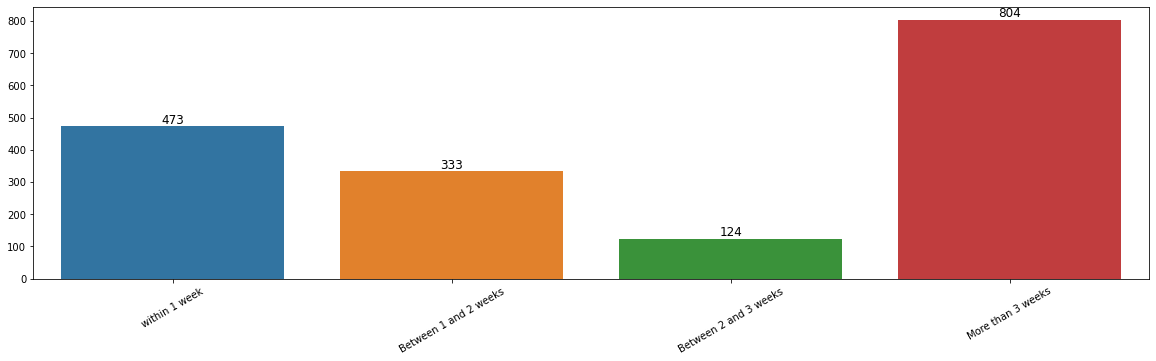

In [18]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [19]:
df_within_1_week = df[df['time_frames'] == 'within 1 week']

In [20]:
df_within_1_month = df[(df['time_frames'].isin(['within 1 week', 'Between 1 and 2 weeks', 'Between 2 and 3 weeks'])) |
                       (df['date_posted'] == '1 month ago')]

# Seniority Level Segments

junior/entry level    1024
associate/senior       712
Name: seniority_segment_created, dtype: int64
            Seniority  number of postings
0  junior/entry level                1024
1    associate/senior                 712


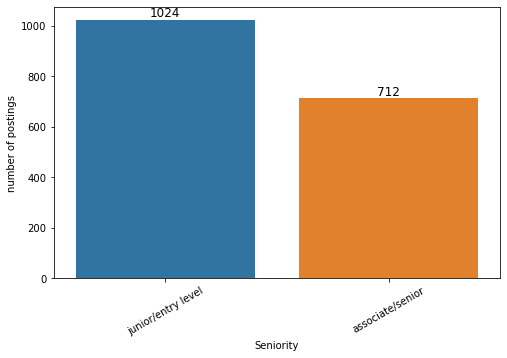

In [21]:
def segment_seniority_levels(x, y):
    if pd.isna(y):
        if ('senior' in x) or ('lead' in x) or ('sr ' in x) or ('director' in x) or ('manager' in x):
            return 'associate/senior'
        else:
            return 'junior/entry level'
    elif y == 'associate':
        return 'associate/senior'
df['seniority_segment_created'] = list(map(segment_seniority_levels, df['position'],df['seniority level']))
print(df['seniority_segment_created'].value_counts())

temp = pd.DataFrame(df['seniority_segment_created'].value_counts()).reset_index()
temp.columns =['Seniority', 'number of postings']
print(temp)

fig, ax = plt.subplots(figsize= (8,5))
ax = sns.barplot(x="Seniority", y="number of postings", data=temp)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [22]:
junior_level_df = df[df['seniority_segment_created']=='junior/entry level']
print(junior_level_df.shape)
senior_level_df = df[df['seniority_segment_created']=='associate/senior']
print(senior_level_df.shape)

(1024, 17)
(712, 17)


# Junior Level job postings by Time Frames 

In [23]:
temp = pd.DataFrame(junior_level_df['time_frames'].value_counts()).reset_index()
temp.columns =['time_frames', 'number of postings']
temp

,time_frames,number of postings
0,More than 3 weeks,495
1,within 1 week,289
2,Between 1 and 2 weeks,164
3,Between 2 and 3 weeks,75


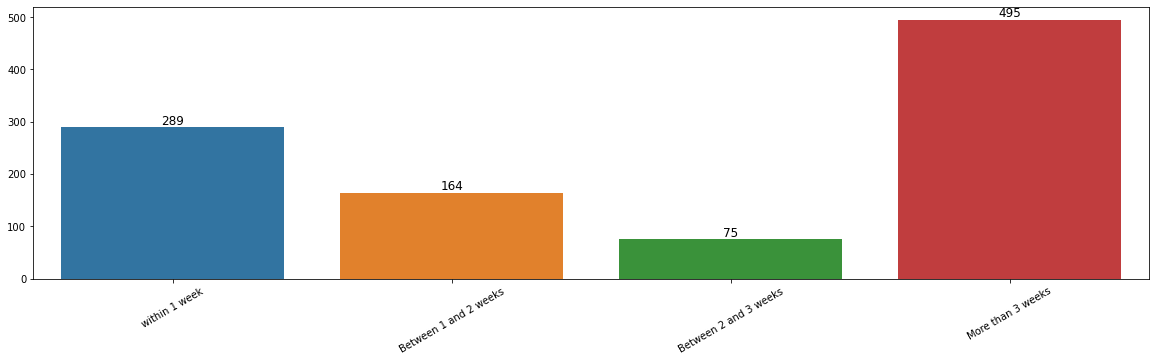

In [24]:
a = 'within 1 week'
b = 'Between 1 and 2 weeks'
c = 'Between 2 and 3 weeks'
d = 'More than 3 weeks'
x = [a,b, c, d]
a = temp[temp['time_frames'] == a]['number of postings'].values[0]
b = temp[temp['time_frames'] == b]['number of postings'].values[0]
c = temp[temp['time_frames'] == c]['number of postings'].values[0]
d = temp[temp['time_frames'] == d]['number of postings'].values[0]
y = [a,b,c,d]
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Companies Hiring

In [25]:
temp = pd.DataFrame(df['company_name'].value_counts()).reset_index()
temp.columns =['company_name', 'number of postings']
temp.head(30)

,company_name,number of postings
0,acronis,197
1,agoda,49
2,tymit,41
3,inetum,35
4,zendesk,35
5,serem consultoría empresarial,31
6,capgemini engineering,28
7,everis,27
8,accenture españa,25
9,page personnel,25


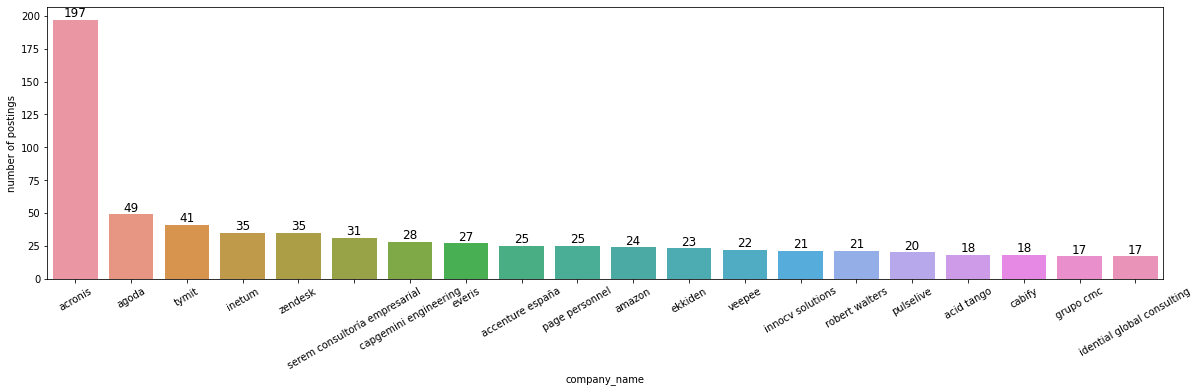

In [26]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=temp.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# top companies hiring within 1 week

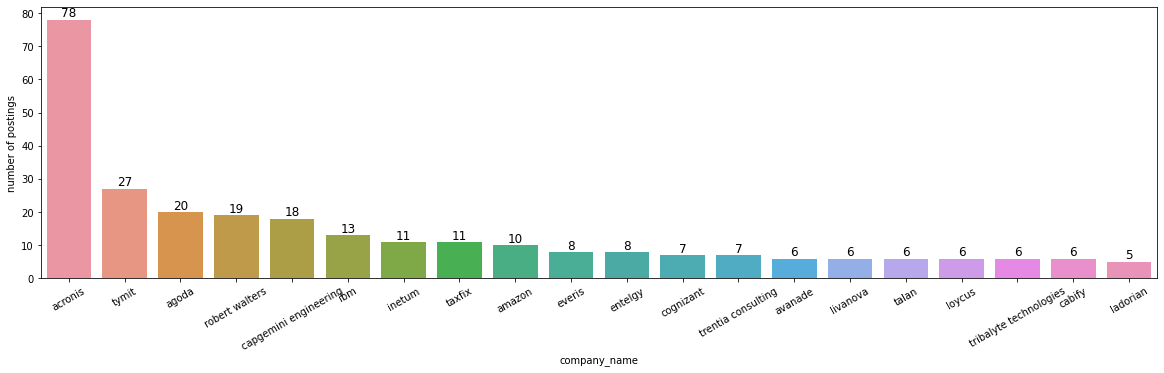

In [27]:
temp = pd.DataFrame(df_within_1_week['company_name'].value_counts()).reset_index()
temp.columns =['company_name', 'number of postings']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=temp.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# top companies hiring within 1 month

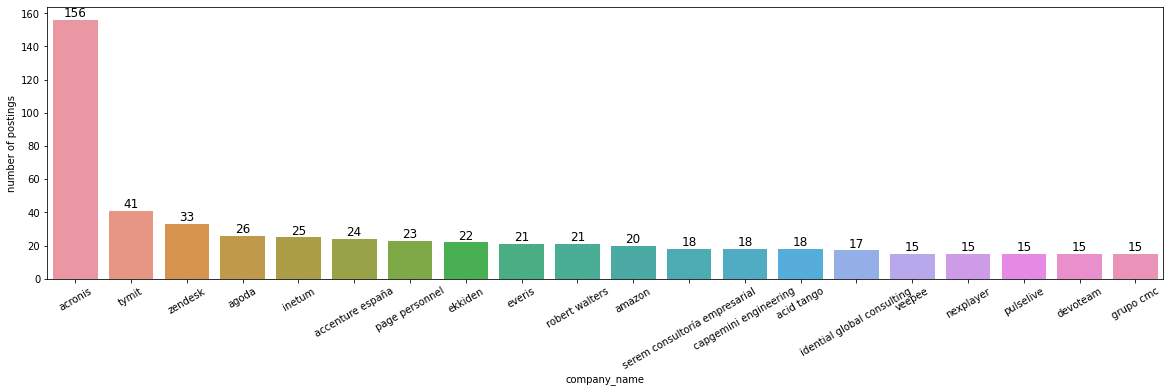

In [28]:
temp = pd.DataFrame(df_within_1_month['company_name'].value_counts()).reset_index()
temp.columns =['company_name', 'number of postings']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=temp.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Companies hiring only for junior positions

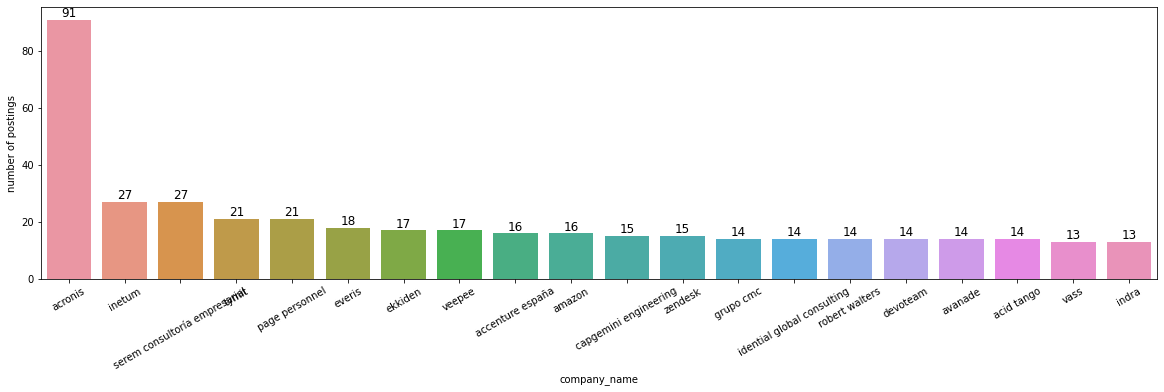

In [29]:
temp = pd.DataFrame(junior_level_df['company_name'].value_counts()).reset_index()
temp.columns =['company_name', 'number of postings']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=temp.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Positions Overall

In [30]:
top_positions = pd.DataFrame(df['position'].value_counts()).reset_index()
top_positions.columns = ['position', 'count']
top_positions

,position,count
0,ios developer,50
1,android developer,45
2,programador full stack,27
3,senior android engineer,22
4,full stack developer,20
5,software engineer,19
6,java developer,18
7,senior android developer,16
8,java software engineer,16
9,fullstack developer,16


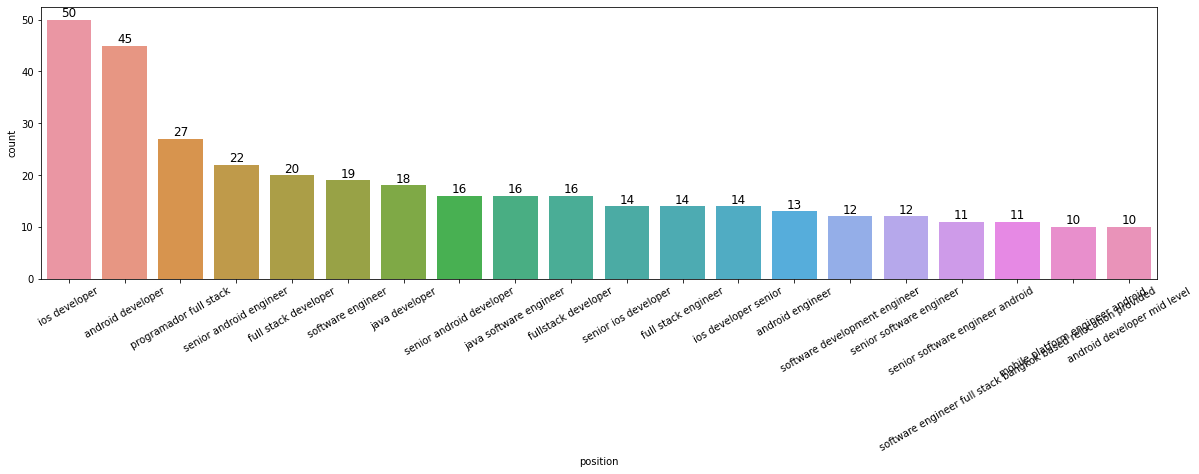

In [31]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="position", y="count", data=top_positions.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Positions this week

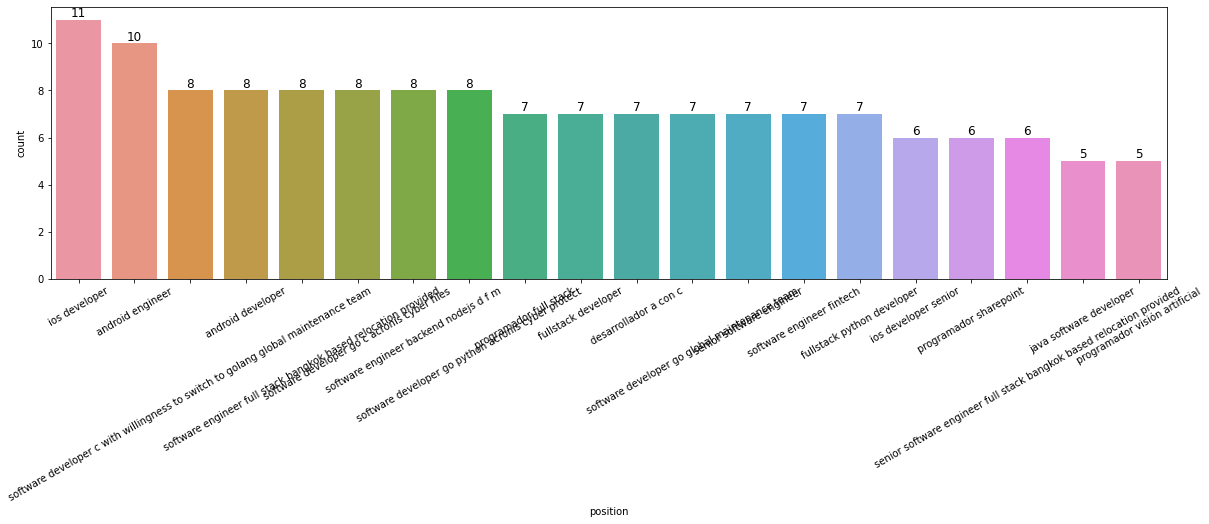

In [32]:
top_positions = pd.DataFrame(df_within_1_week['position'].value_counts()).reset_index()
top_positions.columns = ['position', 'count']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="position", y="count", data=top_positions.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Positions This Month

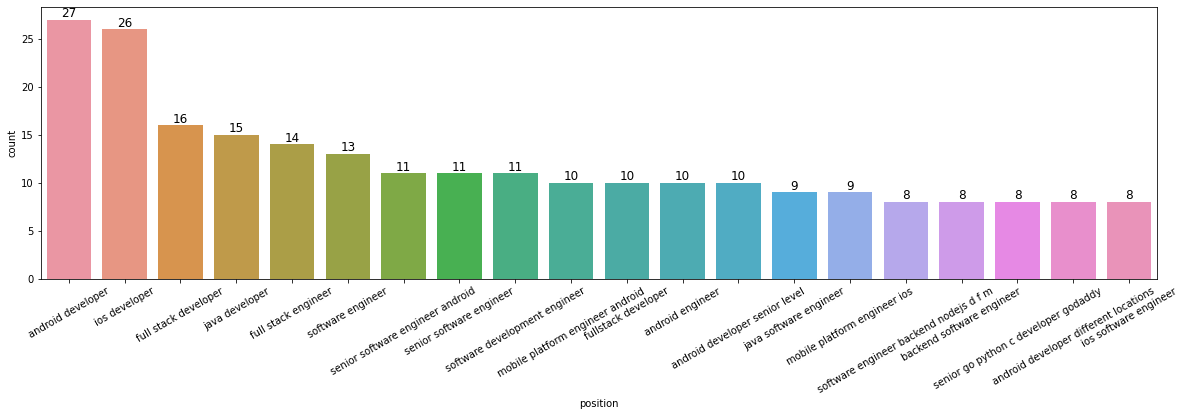

In [33]:
top_positions = pd.DataFrame(df_within_1_month['position'].value_counts()).reset_index()
top_positions.columns = ['position', 'count']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="position", y="count", data=top_positions.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Positions For Junior/Entry Level Roles

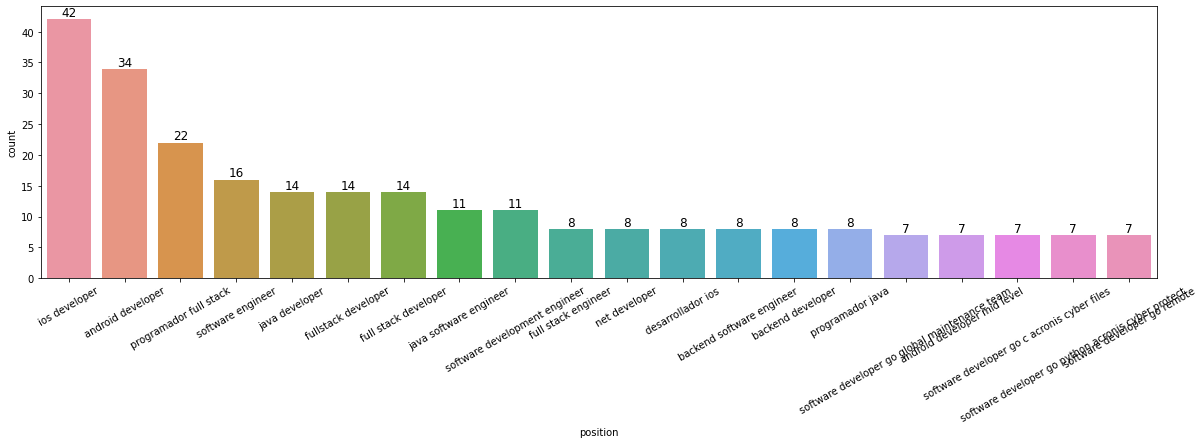

In [34]:
top_positions = pd.DataFrame(junior_level_df['position'].value_counts()).reset_index()
top_positions.columns = ['position', 'count']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="position", y="count", data=top_positions.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [35]:
top_skills = []
for row_content in df['top competitive skills']:
    row_content = row_content.replace('/', ' ').replace('-', ' ')
    if len(row_content) > 3:
        try:
            for item in re.findall('\w+ \w+ \w+', row_content):  # Skills with 3 words
                top_skills.append(item)
            for item in re.findall('\w+ \w+', row_content):  # Skills with 2 words
                top_skills.append(item)
            for item in re.findall('\'\w+\'', row_content):  # Skill with single word
                top_skills.append(re.findall('\w+', item)[0])
        except TypeError:
            pass

top_skills = [item.lower() for item in top_skills]

In [36]:
# len(top_skills)
# ios_skill = []
# for item in top_skills:
#     if 'ios' in item:
#         ios_skill.append(item)
# ios_skill

In [37]:
def clean_skill(x):
    if ('cascading' in x) or ('css' in x):
        return 'css'
    elif 'ios' in x:
        return 'ios'
    elif 'android' in x:
        return 'android'
    elif 'sql' in x:
        return'sql'
    elif 'object oriented' in x:
        return 'object oriented programing'
    elif 'back end' in x:
        return 'back end'
    elif 'front end' in x:
        return 'front end'
    elif ('full stack' in x) or ('fullstack' in x):
        return 'full stack'
    elif 'user interface' in x:
        return 'user interface design'
    elif 'php' in x:
        return 'php'
    elif 'model view' in x:
        return 'model view'
    elif 'programming' in x:
        return 'programming language'
    elif 'azure' in x:
        return 'azure'
    elif 'web design' in x:
        return 'web design'
    elif ('software project' in x) or ('project management' in x):
        return 'project management'
    elif 'java database' in x:
        return 'java database'
    elif 'sap' in x:
        return 'sap'
    elif 'apis' in x:
        return 'apis'
    else:
        return x  

In [38]:
top_skills = pd.Series(top_skills).apply(clean_skill)

# Top Skills of the candidates who applied for the job

In [39]:
x = pd.DataFrame(pd.DataFrame(top_skills).value_counts())
x.columns = ['count']
x = x.reset_index()
x.columns = ['skill', 'count']
x = x[x['count']> 7]
x

,skill,count
0,sql,838
1,css,550
2,android,417
3,javascript,383
4,programming language,381
5,java,267
6,php,233
7,english,172
8,html,170
9,web development,153


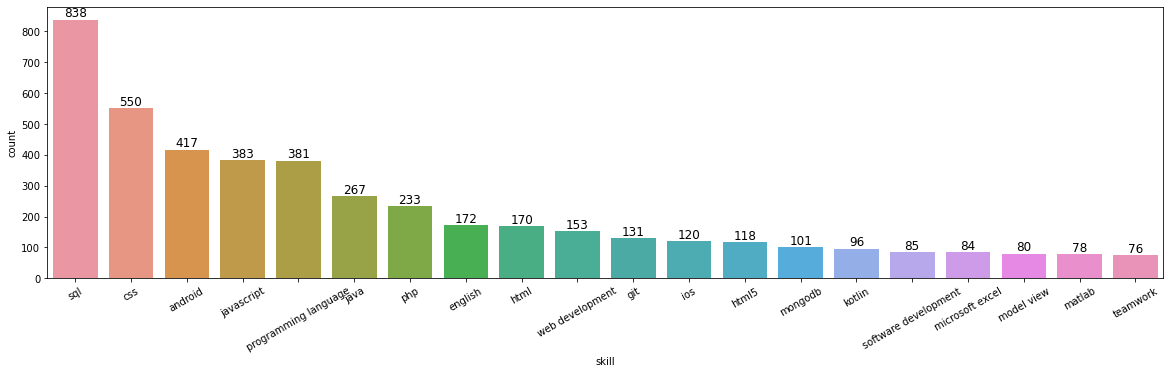

In [40]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=x.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [41]:
skills = x['skill']
skills = list(skills.values)

In [42]:
other_skills = ['swift', 'xamarin', 'appcelerator', 'cordova', 'phonegap', 'buildfire', 'ionic', 'android sdk', 
               'android studio', 'angular', 'objective-c', 'dart', 'lua', 'rust' ,'action script' ,
               'mobile design']

In [43]:
skills = skills + other_skills

# Top Skills Asked by the employers

In [44]:
import re

In [45]:
skills_count = {}
for skill in skills:
    counter = 0
    for description in df['descriptions']:
        if (skill == 'ci') and len(re.findall('ci ', description))>0:
            counter+=1
        elif skill in description:
            counter += 1
    skills_count[skill] = counter

In [46]:
skills_count = pd.DataFrame(dict(sorted(skills_count.items(), key=lambda x: x[1], reverse=True)).items())
skills_count.columns = ['skill', 'count']

In [47]:
skills_count

,skill,count
0,ios,1153
1,java,1079
2,git,1068
3,design,810
4,english,624
5,engineering,558
6,javascript,516
7,android,492
8,sql,478
9,unity,465


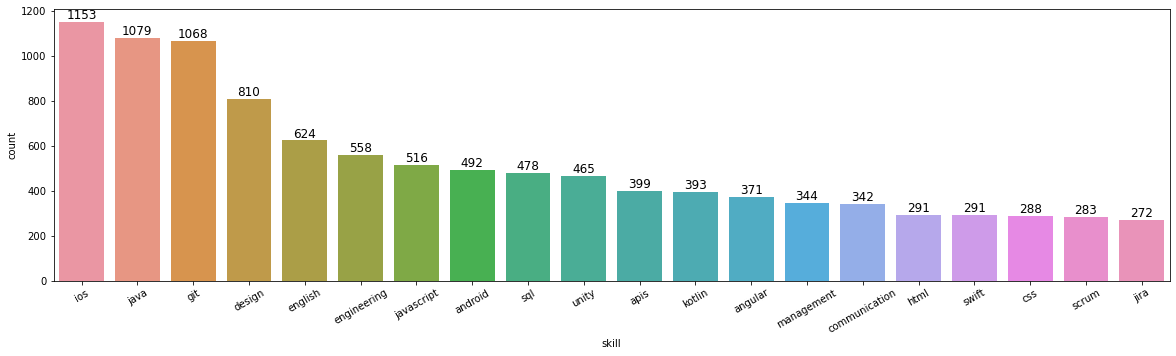

In [48]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Skills Required by Employers for Junior/Entry Level Positions 

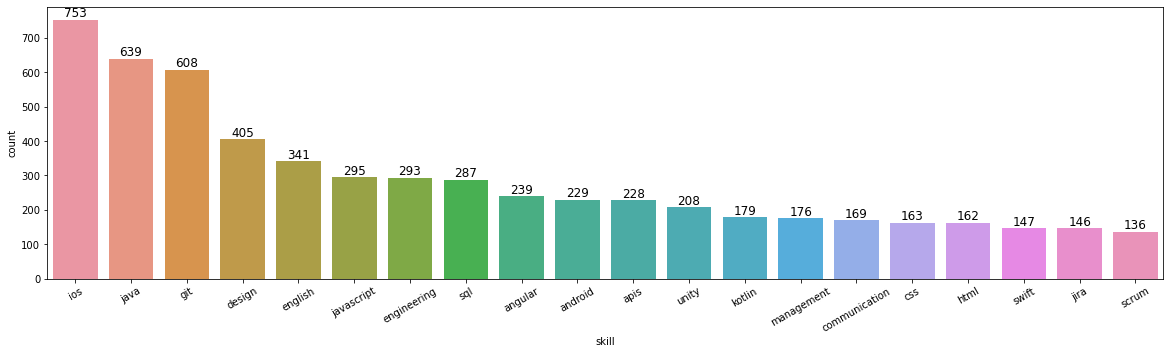

In [49]:
skills_count = {}
for skill in skills:
    counter = 0
    for description in junior_level_df['descriptions']:
        if (skill == 'ci') and len(re.findall('ci ', description))>0:
            counter+=1
        elif skill in description:
            counter += 1
    skills_count[skill] = counter
skills_count = pd.DataFrame(dict(sorted(skills_count.items(), key=lambda x: x[1], reverse=True)).items())
skills_count.columns = ['skill', 'count']
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [50]:
## Next analysis : Top skills for iOS jobs and for Android Jobs 

In [51]:
df['position'].value_counts()

ios developer                                                                         50
android developer                                                                     45
programador full stack                                                                27
senior android engineer                                                               22
full stack developer                                                                  20
software engineer                                                                     19
java developer                                                                        18
senior android developer                                                              16
java software engineer                                                                16
fullstack developer                                                                   16
senior ios developer                                                                  14
full stack engineer  

In [52]:
def platform_ios_android(x, y):
    if 'android' in x:
        return "android"
    elif 'kotlin' in x:
        return "android"
    elif 'ios' in x:
        return 'ios'
    elif 'swift' in x:
        return 'ios'
    elif ('android' in y) and ('ios' not in y):
        return 'android'
    elif ('ios' in y) and ('android' not in y):
        return 'ios'
    elif ('swift' in y) and ('kotlin' not in y) and ('android' not in y):
        return 'ios'
    elif ('kotlin' in y) and ('swift' not in y) and ('ios' not in y):
        return 'android'
    else:
        return 'not specified'     
df['platform'] = list(map(platform_ios_android, df['position'], df['descriptions']))

In [53]:
df['platform'].value_counts()

ios              898
not specified    503
android          335
Name: platform, dtype: int64

# iOS Analysis

In [54]:
ios_df = df[df['platform']=='ios']
ios_df.shape

(898, 18)

In [55]:
# ios_df.head()

In [56]:
ios_junior_df = df[(df['platform']=='ios') & (df['seniority_segment_created']=='junior/entry level')]
ios_junior_df.shape

(621, 18)

In [57]:
# ios_junior_df.head()

# IOS JOBS BY TIMEFRAMES

In [58]:
temp = pd.DataFrame(ios_df['time_frames'].value_counts()).reset_index()
temp.columns =['time_frames', 'number of postings']
temp

,time_frames,number of postings
0,More than 3 weeks,431
1,within 1 week,256
2,Between 1 and 2 weeks,154
3,Between 2 and 3 weeks,55


In [59]:
a = 'within 1 week'
b = 'Between 1 and 2 weeks'
c = 'Between 2 and 3 weeks'
d = 'More than 3 weeks'
x = [a,b, c, d]
a = temp[temp['time_frames'] == a]['number of postings'].values[0]
b = temp[temp['time_frames'] == b]['number of postings'].values[0]
c = temp[temp['time_frames'] == c]['number of postings'].values[0]
d = temp[temp['time_frames'] == d]['number of postings'].values[0]
y = [a,b,c,d]

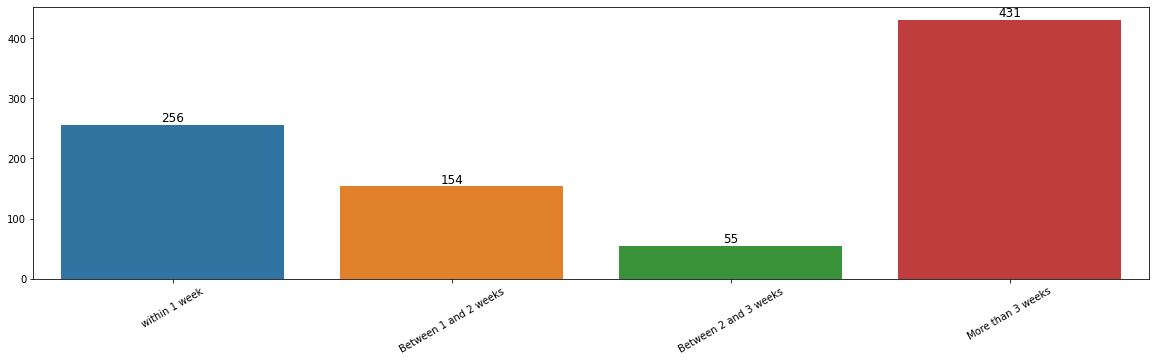

In [60]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# JUNIOR LEVEL IOS JOBS BY TIMEFRAMES

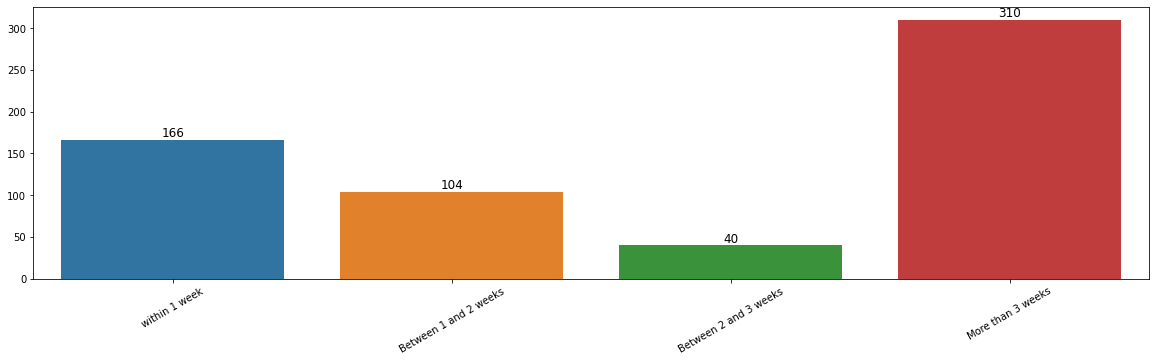

In [61]:
temp = pd.DataFrame(ios_junior_df['time_frames'].value_counts()).reset_index()
temp.columns =['time_frames', 'number of postings']
a = 'within 1 week'
b = 'Between 1 and 2 weeks'
c = 'Between 2 and 3 weeks'
d = 'More than 3 weeks'
x = [a,b, c, d]
a = temp[temp['time_frames'] == a]['number of postings'].values[0]
b = temp[temp['time_frames'] == b]['number of postings'].values[0]
c = temp[temp['time_frames'] == c]['number of postings'].values[0]
d = temp[temp['time_frames'] == d]['number of postings'].values[0]
y = [a,b,c,d]
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# SKILLS

In [62]:
skills_count_ios = {}
counter = 0
for skill in skills:
    counter = 0
    for description in ios_df['descriptions']:
        if (skill == 'ci'):
            if len(re.findall('ci ', description))>0:
                counter+=1
        elif skill in description:
            counter += 1
    skills_count_ios[skill] = counter
skills_count_ios = pd.DataFrame(dict(sorted(skills_count_ios.items(), key=lambda x: x[1], reverse=True)).items())
skills_count_ios.columns = ['skill', 'count']
skills_count_ios = skills_count_ios[skills_count_ios['count']>0]
skills_count_ios

,skill,count
0,ios,894
1,java,548
2,git,546
3,design,235
4,javascript,232
5,angular,231
6,sql,230
7,engineering,210
8,swift,185
9,english,168


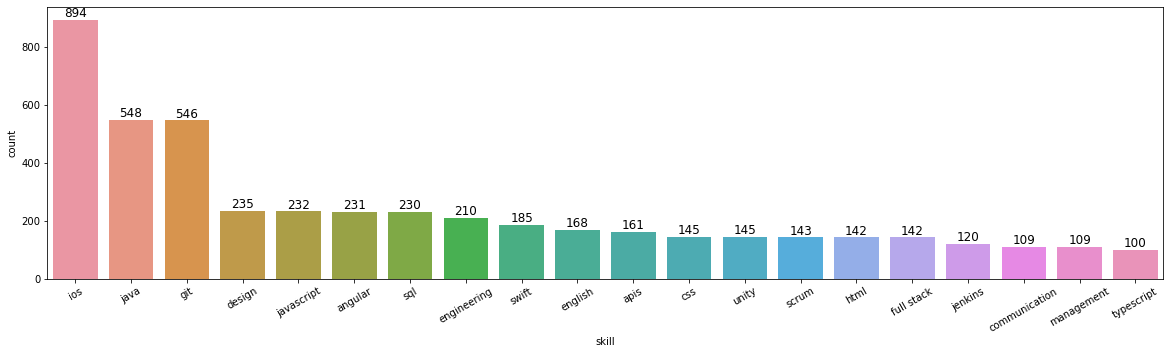

In [63]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

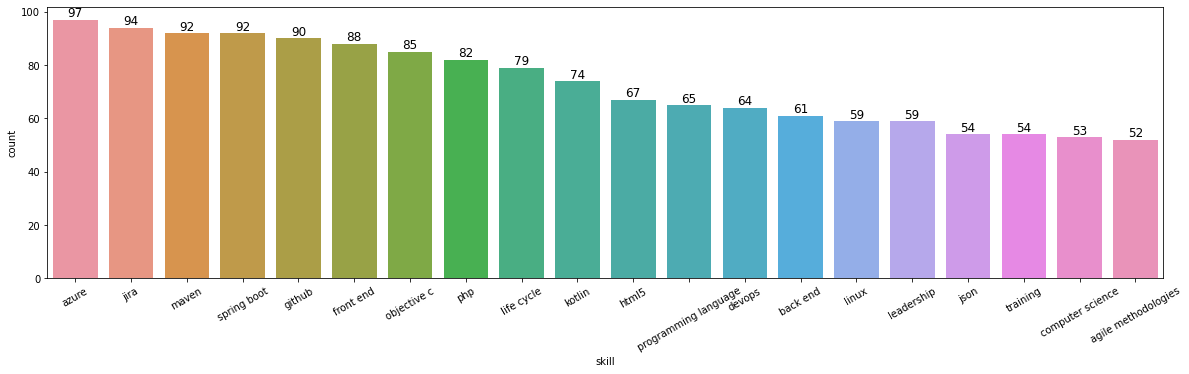

In [64]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_ios.iloc[20:40])
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# JUNIOR LEVEL SKILLS 

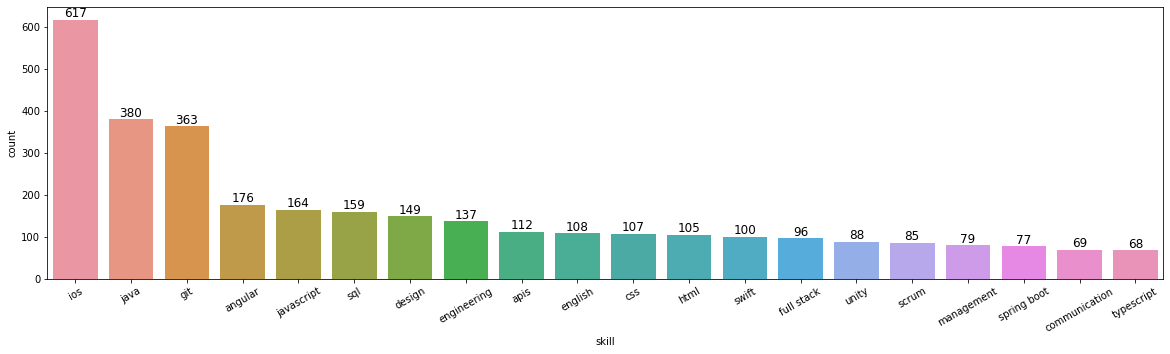

In [65]:
skills_count_ios = {}
counter = 0
for skill in skills:
    counter = 0
    for description in ios_junior_df['descriptions']:
        if (skill == 'ci'):
            if len(re.findall('ci ', description))>0:
                counter+=1
        elif skill in description:
            counter += 1
    skills_count_ios[skill] = counter
skills_count_ios = pd.DataFrame(dict(sorted(skills_count_ios.items(), key=lambda x: x[1], reverse=True)).items())
skills_count_ios.columns = ['skill', 'count']
skills_count_ios = skills_count_ios[skills_count_ios['count']>0]
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top companies iOS

In [66]:
top_companies_ios = pd.DataFrame(ios_df['company_name'].value_counts()).reset_index()
top_companies_ios.columns =['company_name', 'number of postings']
top_companies_ios

,company_name,number of postings
0,inetum,31
1,serem consultoría empresarial,25
2,page personnel,24
3,capgemini engineering,23
4,tymit,18
5,everis,18
6,idential global consulting,17
7,grupo cmc,17
8,robert walters,17
9,ekkiden,15


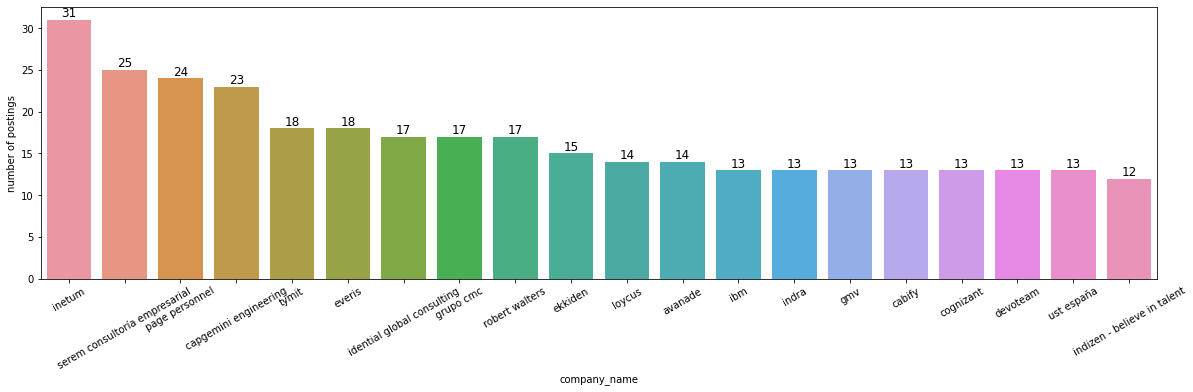

In [67]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# TOP IOS JOB COMPANIES FOR JUNIOR POSITIONS 

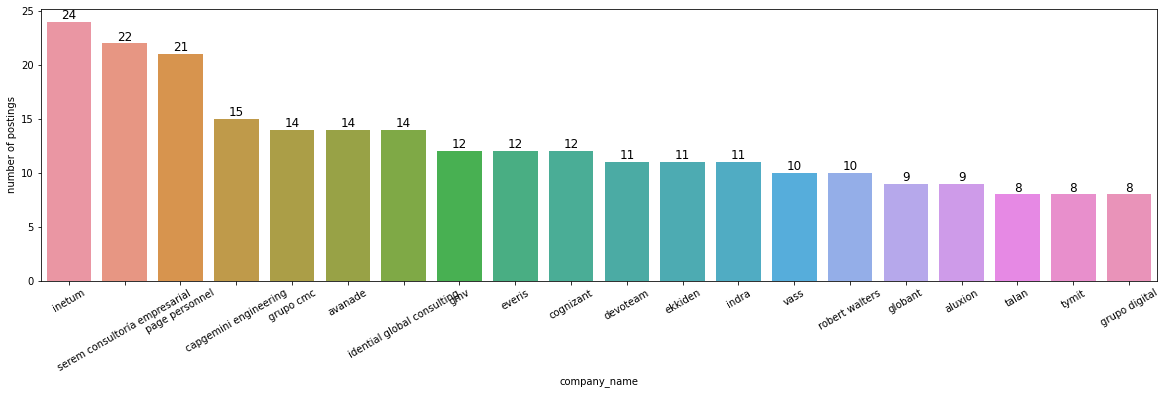

In [68]:
top_companies_ios = pd.DataFrame(ios_junior_df['company_name'].value_counts()).reset_index()
top_companies_ios.columns =['company_name', 'number of postings']
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Android Analysis

In [69]:
android_df = df[df['platform']=='android']
android_df.shape

(335, 18)

In [70]:
android_junior_df = df[(df['platform']=='android') & (df['seniority_segment_created']=='junior/entry level')]
android_junior_df.shape

(156, 18)

# ANDROID JOBS BY TIMEFRAME

In [71]:
temp = pd.DataFrame(android_df['time_frames'].value_counts()).reset_index()
temp.columns =['time_frames', 'number of postings']
temp

,time_frames,number of postings
0,More than 3 weeks,178
1,within 1 week,69
2,Between 1 and 2 weeks,62
3,Between 2 and 3 weeks,26


In [72]:
a = temp['time_frames'][0]
b = temp['time_frames'][2]
c = temp['time_frames'][3]
d = temp['time_frames'][1]
x = [a,b, c, d]
a = temp['number of postings'][0]
b = temp['number of postings'][2]
c = temp['number of postings'][3]
d = temp['number of postings'][1]
y = [a,b,c,d]

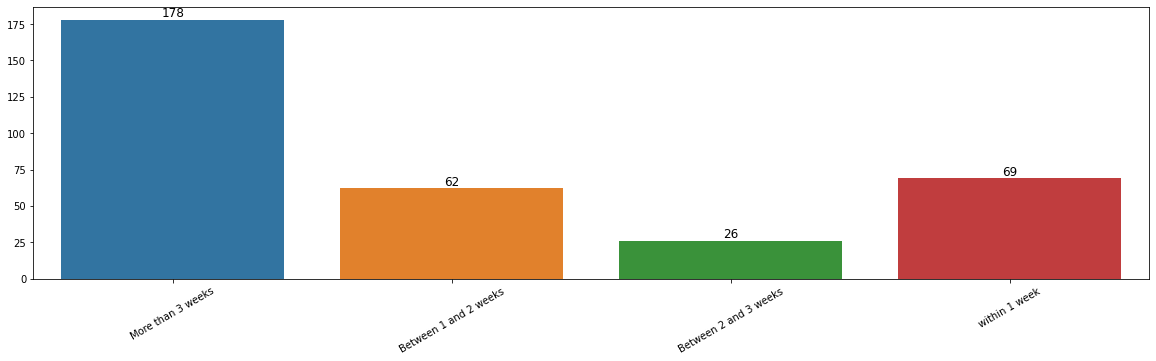

In [73]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# JUNIOR LEVEL ANDROID JOBS BY TIME FRAME

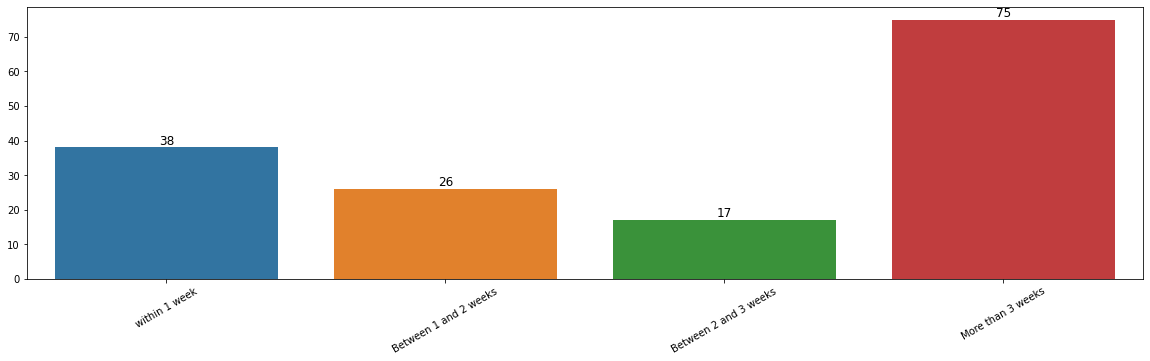

In [74]:
temp = pd.DataFrame(android_junior_df['time_frames'].value_counts()).reset_index()
temp.columns =['time_frames', 'number of postings']
a = 'within 1 week'
b = 'Between 1 and 2 weeks'
c = 'Between 2 and 3 weeks'
d = 'More than 3 weeks'
x = [a,b, c, d]
a = temp[temp['time_frames'] == a]['number of postings'].values[0]
b = temp[temp['time_frames'] == b]['number of postings'].values[0]
c = temp[temp['time_frames'] == c]['number of postings'].values[0]
d = temp[temp['time_frames'] == d]['number of postings'].values[0]
y = [a,b,c,d]
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# ANDROID SKILLS 

In [75]:
skills_count_android = {}
counter = 0
for skill in skills:
    counter = 0
    for description in android_df['descriptions']:
        if (skill == 'ci'):
            if len(re.findall('ci ', description))>0:
                counter+=1
        elif skill in description:
            counter += 1
    skills_count_android[skill] = counter
skills_count_android = pd.DataFrame(dict(sorted(skills_count_android.items(), key=lambda x: x[1], reverse=True)).items())
skills_count_android.columns = ['skill', 'count']
skills_count_android = skills_count_android[skills_count_android['count']>0]
skills_count_android.head(20)

,skill,count
0,android,302
1,kotlin,279
2,java,245
3,git,235
4,design,205
5,unity,164
6,english,122
7,ios,117
8,engineering,114
9,apis,111


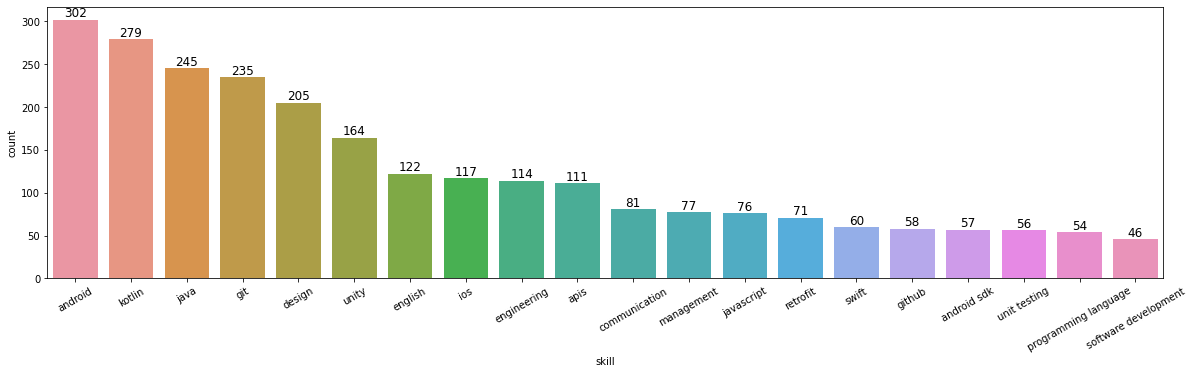

In [76]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_android.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# ANDROID SKILLS FOR JUNIOR POSITIONS 

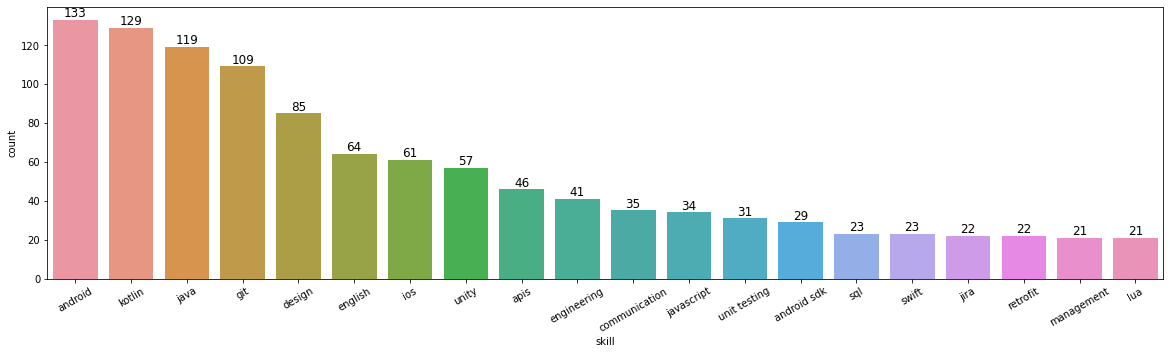

In [77]:
skills_count_ios = {}
counter = 0
for skill in skills:
    counter = 0
    for description in android_junior_df['descriptions']:
        if (skill == 'ci'):
            if len(re.findall('ci ', description))>0:
                counter+=1
        elif skill in description:
            counter += 1
    skills_count_ios[skill] = counter
skills_count_ios = pd.DataFrame(dict(sorted(skills_count_ios.items(), key=lambda x: x[1], reverse=True)).items())
skills_count_ios.columns = ['skill', 'count']
skills_count_ios = skills_count_ios[skills_count_ios['count']>0]
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top companies Android

In [78]:
top_companies_android = pd.DataFrame(android_df['company_name'].value_counts()).reset_index()
top_companies_android.columns =['company_name', 'number of postings']
top_companies_android

,company_name,number of postings
0,zendesk,21
1,pulselive,20
2,acronis,16
3,agoda,15
4,tidal,14
5,tymit,12
6,accenture españa,12
7,veepee,9
8,stratusgrid,8
9,fever,8


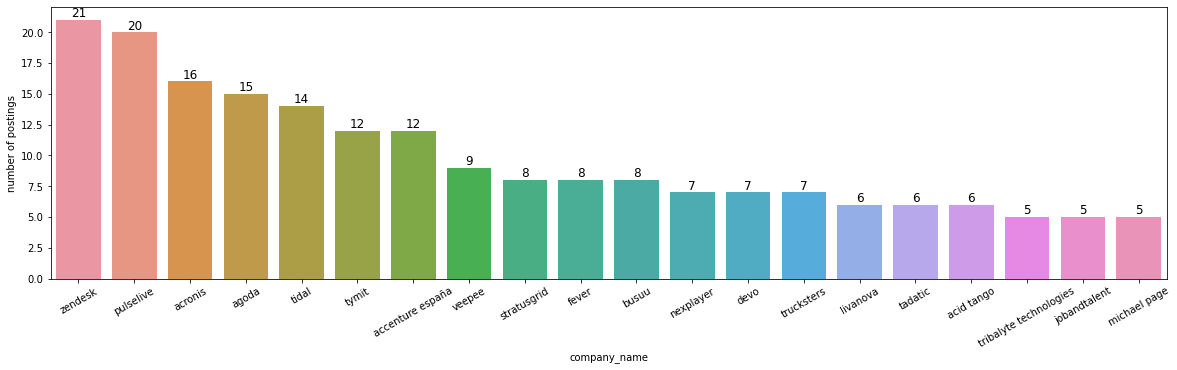

In [79]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies_android.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# TOP COMPANIES ANDROID FOR JUNIOR POSITIONS 

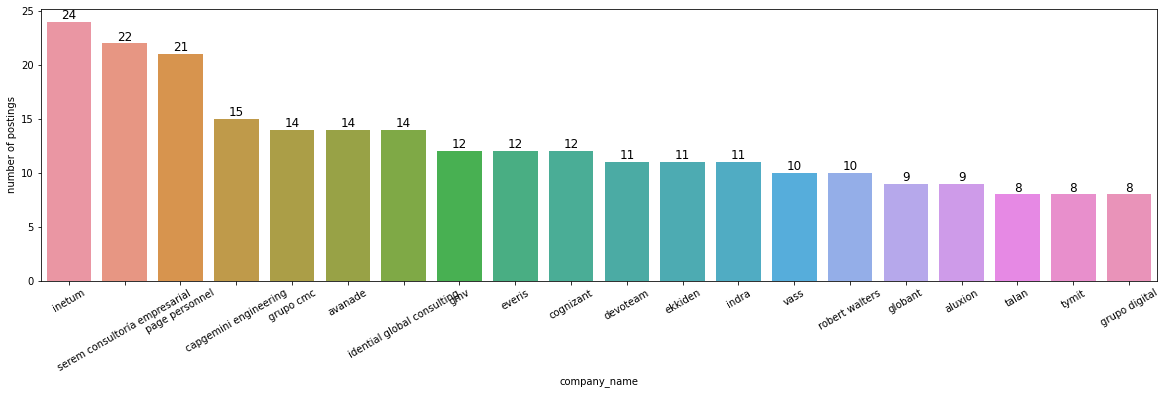

In [80]:
top_companies_android = pd.DataFrame(android_junior_df['company_name'].value_counts()).reset_index()
top_companies_android.columns =['company_name', 'number of postings']
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()